In [10]:
import pandas as pd
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> u

Nothing to update.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [3]:
data = pd.read_csv("philosophy_data.csv")
data.head(5)

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
from nltk.tokenize import word_tokenize
for line in data.sentence_lowered[10]:
    for field in line:
        tokens = word_tokenize(field)

In [55]:
output = []
for i in data.sentence_lowered:
    wt = word_tokenize(i)
    output += wt

print(output[0:5])

['what', "'s", 'new', ',', 'socrates']


In [59]:
frequency = {}
for i in output:
    if i in frequency:
        frequency[i] += 1
    else:
        frequency[i] = 1

for i in list(frequency)[0:10]:
    print(i, ":" ,frequency[i])

what : 37089
's : 22311
new : 4921
, : 669071
socrates : 2110
to : 260105
make : 8589
you : 19516
leave : 1091
your : 4045


In [68]:
import matplotlib.pyplot as plt
name = []
fre = []
for i in list(frequency)[8000:8050]:
    name.append(i)
    fre.append(frequency[i]) 

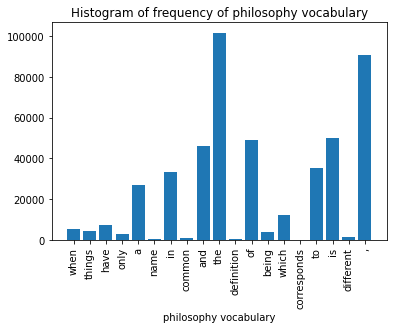

In [79]:
plt.bar(range(len(name)),fre)
plt.xlabel("philosophy vocabulary")
plt.title("Histogram of frequency of philosophy vocabulary")
plt.xticks(range(len(name)), name, rotation='vertical')
plt.show()

In [74]:
output = []
for i in data.sentence_lowered[data.author == "Aristotle"]:
    wt = word_tokenize(i)
    output += wt    
frequency = {}
for i in output:
    if i in frequency:
        frequency[i] += 1
    else:
        frequency[i] = 1
        
dictionary_keys=list(frequency.keys())
Aristotle = {dictionary_keys[i]:sorted(frequency.values(), reverse=True)[i] for i in range(len(dictionary_keys))}

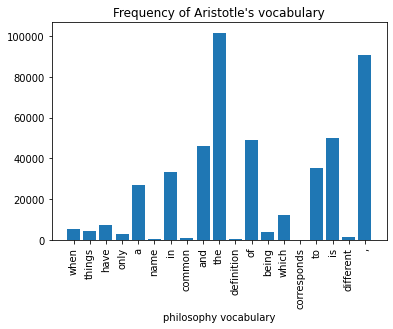

In [76]:
name = []
fre = []
for i in list(frequency)[0:19]:
    name.append(i)
    fre.append(frequency[i]) 
plt.bar(range(len(name)), fre)
plt.xlabel("philosophy vocabulary")
plt.title("Frequency of Aristotle's vocabulary")
plt.xticks(range(len(name)), name, rotation='vertical')
plt.show()

In [85]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

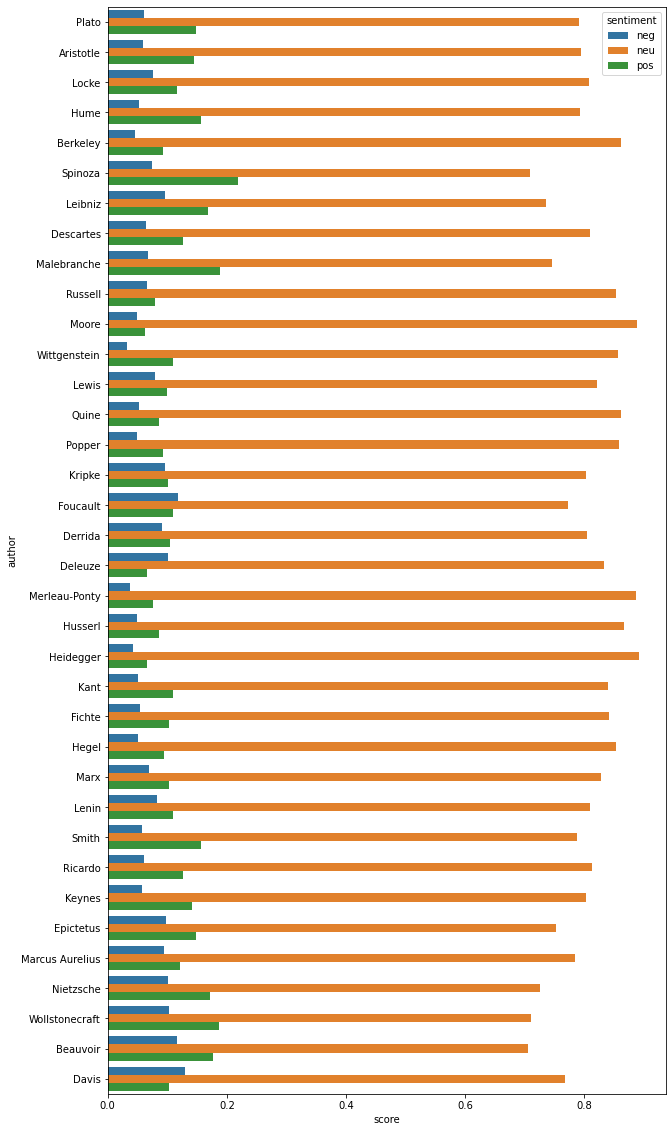

In [90]:
from random import sample
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
author = data['author'].unique().tolist()
author_score = []
author1 = []
senti = []
senti1 = ['neg','neu','pos']
for a in range(len(author)):
    data_temp = data[data.author==author[a]]
    text_list = data_temp.lemmatized_str.to_list()
    list1 = sample(text_list,min(100,len(text_list)))
    text = ' '.join(list1)
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(text)
    for i in range(len(senti1)):
        author1.append(author[a])
        author_score.append(score.get(senti1[i]))
    senti.extend(senti1)
author_df = pd.DataFrame(zip(author1,author_score,senti),columns=['author','score','sentiment'])
plt.figure(figsize=(10,20))
sns.barplot(x='score',y='author',hue='sentiment', data=author_df)
plt.show()

In [96]:
!pip install nltk
!pip install spacy
!pip install markovify
!pip install -m spacy download en

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 6.8 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18627 sha256=260801bebb185c73fb84dc10142a6865e8712b379e6d97ef6d74b44a9b6786a2
  Stored in directory: /root/.cache/pip/wheels/aa/9d/bb/96461cbfde2120f3612c7c2af202976d46542735a2cd8b00f8
Successfully built markovify

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [op

In [97]:
import spacy
import re
import markovify
import nltk
from nltk.corpus import gutenberg
import warnings
warnings.filterwarnings('ignore')
nltk.download('gutenberg')
!python -m spacy download en

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-08 22:13:56.138018: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [100]:
generator_1 = markovify.Text(data.sentence_lowered[data.author == "Aristotle"], state_size=3)

In [101]:
for i in range(3):
  print(generator_1.make_sentence())

another line is to draw off liquid.
consequently, when moisture is engendered in greater abundance, so that it stands in the way.
near the city of thurium they say there is a meaning also in the pipes.
